#### Importing Libraries

In [245]:
# for working with large numbers and numerical computations
import numpy as np  

# used for loading datasets as Dataframe
import pandas as pd 

# used for loading .arff file into Dataframe
from scipy.io.arff import loadarff

#basic data visualization
from matplotlib import pyplot as plt  

In [1]:
# Reading the data
raw_data = loadarff(r'C:\Users\Dell\Music\vehicle.arff') 
df = pd.DataFrame(raw_data[0])
                  
                  
df.head()

NameError: name 'loadarff' is not defined

In [247]:


#computing the mahalanobis distance
def mahalanobis(x,data):
    #calculating the mean
    mean = np.mean(data) 
    
    #ith element - mean
    difference = x-mean
    
    # calculating inverse of covariance matrix
    covMatrix = np.linalg.inv(np.cov(data.values.T))    
    temp = np.dot(difference,covMatrix)
    
    distance = np.dot(temp,difference.T)
    
    #Mahalanobis distance is the diagonal elements
    return distance.diagonal()



df['Mahalanobis'] = mahalanobis(df.iloc[:,:-1],df.iloc[:,:-1])  # make a new column in the dataset for MD 
                                                                # calculated for all points



df.head() #top 5 rows, after computing MD


dist = list(df['Mahalanobis'])

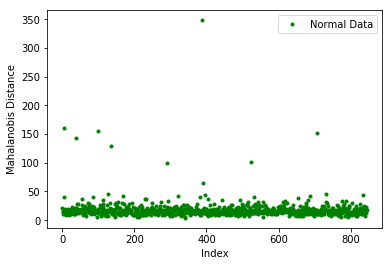

In [248]:
#plotting the data
plt.plot(dist,'r.', color = 'g', label = 'Normal Data')
plt.ylabel("Mahalanobis Distance")
plt.xlabel("Index")
plt.legend()

In [249]:
len(dist)

846

In [250]:
def plotOutlier(threshold):
    outliers = []
    outliers_index = []
    for i in range(len(df)):
        if df.loc[i][len(df.columns) - 1] >= threshold:
            outliers.append(df.loc[i])
            outliers_index.append(i)
    print("So the outliers on the basis of threshold = ", threshold)
    print("\nTotal No. of outliers : ",len(outliers))
    print("\nIndex : ",outliers_index)

    plt.plot(dist,'r.',color = 'g', label = "Normal Dataset")
    plt.xlabel("Mahalanobis Distance")
    plt.ylabel("Index")
    for i in range(len(outliers)):
        plt.plot(outliers_index[i], dist[outliers_index[i]], 'ro', label = "Outlier Detected")
        if i == 0:
            plt.legend()


#### For threshold = 200

So the outliers on the basis of threshold =  200

Total No. of outliers :  1

Index :  [388]


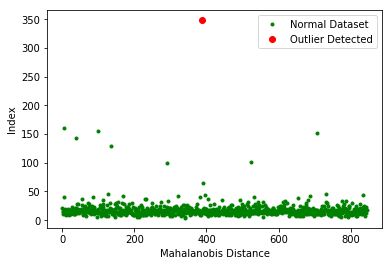

In [251]:
plotOutlier(200)

#### For threshold = 150

So the outliers on the basis of threshold =  150

Total No. of outliers :  4

Index :  [4, 100, 388, 706]


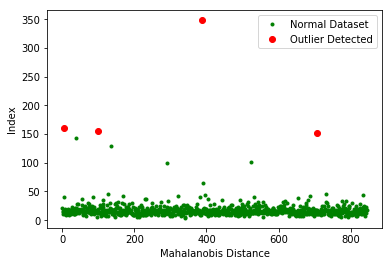

In [252]:
plotOutlier(150)

#### On analysing the data we noticed that if the distance is greater than 200, we will have an outlier since almost all the data present under a distance of 200.So, we takes threshold = 200
